# Predict with pre-trained models

This tutorial explains how to recognize objects in an image with a
pre-trained model, and how to perform feature extraction.

## Prerequisites

To complete this tutorial, we need:

- MXNet. See the instructions for your operating system in [Setup and Installation](http://mxnet.io/get_started/install.html)

- [Python Requests](http://docs.python-requests.org/en/master/), [Matplotlib](https://matplotlib.org/) and [Jupyter Notebook](http://jupyter.org/index.html).

```
$ pip install requests matplotlib jupyter opencv-python
```

## Loading

We first download a pre-trained ResNet 152 layer that is trained on the full
ImageNet dataset with over 10 million images and 10 thousand classes. A
pre-trained model contains two parts, a json file containing the model
definition and a binary file containing the parameters. In addition, there may be
a text file for the labels.

In [ ]:
# 2020-10-31 Updated
# Source of the file: https://mxnet.apache.org/versions/1.0.0/tutorials/python/predict_image.html
# Training Task is based on: https://www.arcada.fi/en/further-education/big-data Machine Learning for Predictive Problems
# Training Task Example:
# 1.go to https://notebooks.csc.fi
# 2.Install MXNet v1.5 and its dependencies.
# 3.go to https://mxnet.apache.org/versions/1.0.0/tutorials/python/predict_image.html and 
# 4.download the predict_image.ipynb notebook.
# 5.Perform different prediction for images on different urls.


In [9]:
# !pip install mxnet

     |████████████████████████████████| 55.0 MB 33.6 MB/s eta 0:00:01/s eta 0:00:28                         | 6.5 MB 1.8 MB/s eta 0:00:27                     | 7.9 MB 1.8 MB/s eta 0:00:27 |█████▌                          | 9.4 MB 1.8 MB/s eta 0:00:26  | 10.9 MB 1.8 MB/s eta 0:00:25��██▌                       | 14.6 MB 1.8 MB/s eta 0:00:23��█████▌                      | 16.3 MB 1.8 MB/s eta 0:00:22  | 17.8 MB 1.8 MB/s eta 0:00:21██▌                   | 21.6 MB 1.8 MB/s eta 0:00:19█████▍                  | 23.0 MB 1.8 MB/s eta 0:00:18          | 24.6 MB 33.6 MB/s eta 0:00:01 MB 33.6 MB/s eta 0:00:01  | 28.7 MB 33.6 MB/s eta 0:00:01.2 MB 33.6 MB/s eta 0:00:01   |██████████████████▌             | 31.8 MB 33.6 MB/s eta 0:00:01��██████████████████▌            | 33.6 MB 33.6 MB/s eta 0:00:01�████████▊           | 35.6 MB 33.6 MB/s eta 0:00:01█████████████████▋          | 37.1 MB 33.6 MB/s eta 0:00:018.8 MB 33.6 MB/s eta 0:00:01█████▌        | 40.3 MB 33.6 MB/s eta 0:00:01��████████████████▍  

In [11]:
import mxnet as mx
path='http://data.mxnet.io/models/imagenet-11k/'
[mx.test_utils.download(path+'resnet-152/resnet-152-symbol.json'),
 mx.test_utils.download(path+'resnet-152/resnet-152-0000.params'),
 mx.test_utils.download(path+'synset.txt')]

['resnet-152-symbol.json', 'resnet-152-0000.params', 'synset.txt']

Next, we load the downloaded model. *Note:* If GPU is available, we can replace all
occurrences of `mx.cpu()` with `mx.gpu()` to accelerate the computation.

In [13]:
sym, arg_params, aux_params = mx.model.load_checkpoint('resnet-152', 0)
mod = mx.mod.Module(symbol=sym, context=mx.cpu(), label_names=None)
mod.bind(for_training=False, data_shapes=[('data', (1,3,224,224))], 
         label_shapes=mod._label_shapes)
mod.set_params(arg_params, aux_params, allow_missing=True)
with open('synset.txt', 'r') as f:
    labels = [l.rstrip() for l in f]

## Predicting

We first define helper functions for downloading an image and performing the
prediction:

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
import cv2
import numpy as np
# define a simple data batch
from collections import namedtuple
Batch = namedtuple('Batch', ['data'])

def get_image(url, show=False):
    # download and show the image
    fname = mx.test_utils.download(url)
    img = cv2.cvtColor(cv2.imread(fname), cv2.COLOR_BGR2RGB)
    if img is None:
         return None
    if show:
         plt.imshow(img)
         plt.axis('off')
    # convert into format (batch, RGB, width, height)
    img = cv2.resize(img, (224, 224))
    img = np.swapaxes(img, 0, 2)
    img = np.swapaxes(img, 1, 2)
    img = img[np.newaxis, :]
    return img

def predict(url):
    img = get_image(url, show=True)
    # compute the predict probabilities
    mod.forward(Batch([mx.nd.array(img)]))
    prob = mod.get_outputs()[0].asnumpy()
    # print the top-5
    prob = np.squeeze(prob)
    a = np.argsort(prob)[::-1]
    for i in a[0:5]:
        print('probability=%f, class=%s' %(prob[i], labels[i]))

In [15]:
# !pip install cv2

ERROR: Could not find a version that satisfies the requirement cv2 (from versions: none)
ERROR: No matching distribution found for cv2
Note: you may need to restart the kernel to use updated packages.


In [16]:
# !pip install opencv-python-headless

     |████████████████████████████████| 36.7 MB 40.6 MB/s eta 0:00:01██████▍                       | 9.7 MB 2.0 MB/s eta 0:00:140:13███                   | 14.8 MB 2.0 MB/s eta 0:00:11�█████████████▉                | 18.1 MB 40.6 MB/s eta 0:00:01�█████████▏              | 19.6 MB 40.6 MB/s eta 0:00:01 0:00:01 MB 40.6 MB/s eta 0:00:01��████████████▏         | 25.4 MB 40.6 MB/s eta 0:00:01█████▊        | 27.2 MB 40.6 MB/s eta 0:00:01��█████████████████       | 28.5 MB 40.6 MB/s eta 0:00:01MB 40.6 MB/s eta 0:00:01/s eta 0:00:014 MB 40.6 MB/s eta 0:00:01 MB 40.6 MB/s eta 0:00:01███████▉| 36.5 MB 40.6 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [17]:
# !pip install --user kaggle --upgrade

     |████████████████████████████████| 58 kB 1.5 MB/s eta 0:00:011
     |████████████████████████████████| 78 kB 3.3 MB/s eta 0:00:011
  Created wheel for kaggle: filename=kaggle-1.5.9-py3-none-any.whl size=73265 sha256=712ffc288437274b6cfe16d38c975dc1416421f593db1f0776dc651f8dd04508
  Stored in directory: /home/jovyan/.cache/pip/wheels/09/25/76/1bbe8ad0c423e8655942b6d3c781f58e0ea2791bf8ee8985b3
  Created wheel for python-slugify: filename=python_slugify-4.0.1-py2.py3-none-any.whl size=6767 sha256=74576b1e6fce22597a15d5ed329b6621fe07cac59c4fbd1e2e35ebf34eb21b97
  Stored in directory: /home/jovyan/.cache/pip/wheels/48/1b/6f/5c1cfab22eacbe0095fc619786da6571b55253653c71324b5c
  Created wheel for slugify: filename=slugify-0.0.1-py3-none-any.whl size=1908 sha256=75a51da69090b8ace5c160f860098ea5acdd4ef05f2de01cee352bcaaf6bc671
  Stored in directory: /home/jovyan/.cache/pip/wheels/d4/7b/0d/bd65011a1b442843bb4043e396f727ab0f1e76050355b9156a
Successfully built kaggle python-slugify slugify
  C

Now, we can perform prediction with any downloadable URL:

In [19]:
predict('http://writm.com/wp-content/uploads/2016/08/Cat-hd-wallpapers.jpg')

error: OpenCV(4.4.0) /tmp/pip-req-build-2mquh264/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


In [20]:
predict('http://thenotoriouspug.com/wp-content/uploads/2015/01/Pug-Cookie-1920x1080-1024x576.jpg')

download failed, retrying, 4 attempts left
download failed, retrying, 3 attempts left
download failed, retrying, 2 attempts left
download failed, retrying, 1 attempt left


AssertionError: failed to open http://thenotoriouspug.com/wp-content/uploads/2015/01/Pug-Cookie-1920x1080-1024x576.jpg

probability=0.478086, class=n01818515 macaw
probability=0.167929, class=n01816887 parrot
probability=0.121939, class=n01817346 poll, poll parrot
probability=0.120981, class=n10401331 parrot
probability=0.023635, class=n01817263 popinjay


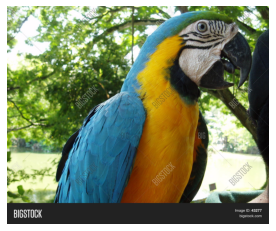

In [24]:
predict('https://static2.bigstockphoto.com/2/3/4/large1500/43277.jpg')

probability=0.536833, class=n01818515 macaw
probability=0.172208, class=n01816887 parrot
probability=0.109566, class=n10401331 parrot
probability=0.071395, class=n01817346 poll, poll parrot
probability=0.047627, class=n01817263 popinjay


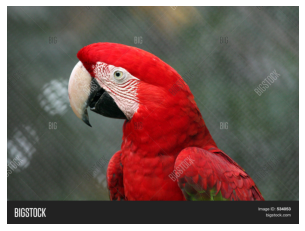

In [25]:
predict('https://static1.bigstockphoto.com/4/3/5/large1500/534053.jpg')

probability=0.492966, class=n02127292 common lynx, Lynx lynx
probability=0.377529, class=n02127052 lynx, catamount
probability=0.038985, class=n02127381 Canada lynx, Lynx canadensis
probability=0.030045, class=n02127482 bobcat, bay lynx, Lynx rufus
probability=0.009151, class=n02127586 spotted lynx, Lynx pardina


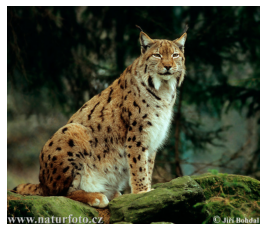

In [27]:
predict('https://www.naturephoto-cz.com/photos/others/ilves-3162.jpg')

probability=0.517422, class=n02127292 common lynx, Lynx lynx
probability=0.411935, class=n02127052 lynx, catamount
probability=0.018715, class=n02127586 spotted lynx, Lynx pardina
probability=0.015759, class=n02127381 Canada lynx, Lynx canadensis
probability=0.013827, class=n02127482 bobcat, bay lynx, Lynx rufus


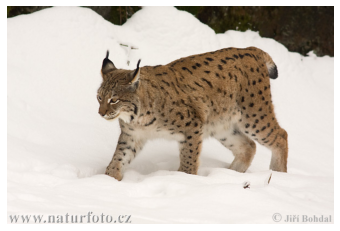

In [28]:
predict('https://www.naturephoto-cz.com/photos/others/ilves-50971.jpg')

probability=0.153028, class=n07734744 mushroom
probability=0.134796, class=n13019835 deer mushroom, Pluteus cervinus
probability=0.113338, class=n13000891 mushroom
probability=0.083058, class=n13011595 gill fungus
probability=0.066746, class=n13022709 mycelium


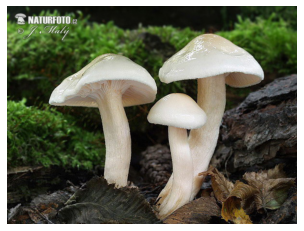

In [29]:
predict('https://www.naturephoto-cz.com/photos/maly/etelanvahakas-xxx294.jpg')

probability=0.316677, class=n01944955 garden snail
probability=0.314561, class=n01944390 snail
probability=0.219709, class=n01945143 brown snail, Helix aspersa
probability=0.104982, class=n01940736 mollusk, mollusc, shellfish
probability=0.029441, class=n01944812 edible snail, Helix pomatia


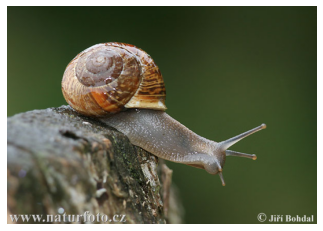

In [30]:
predict('https://www.naturephoto-cz.com/photos/others/lehtokotilo-25279.jpg')

probability=0.500277, class=n07735510 pumpkin
probability=0.356644, class=n03590841 jack-o'-lantern
probability=0.050241, class=n12158443 pumpkin, pumpkin vine, autumn pumpkin, Cucurbita pepo
probability=0.023360, class=n12162425 prairie gourd, prairie gourd vine, Missouri gourd, wild pumpkin, buffalo gourd, calabazilla, Cucurbita foetidissima
probability=0.004822, class=n04965179 orange, orangeness


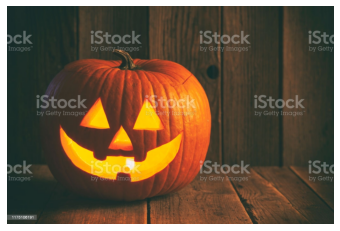

In [37]:
predict('https://media.istockphoto.com/photos/halloween-jack-o-lantern-on-rustic-wooden-background-picture-id1175106191')

## Feature extraction

By feature extraction, we mean presenting the input images by the output of an
internal layer rather than the last softmax layer. These outputs, which can be
viewed as the feature of the raw input image, can then be used by other
applications such as object detection.

We can use the ``get_internals`` method to get all internal layers from a
Symbol.

In [31]:
# list the last 10 layers
all_layers = sym.get_internals()
all_layers.list_outputs()[-10:]

['bn1_moving_var',
 'bn1_output',
 'relu1_output',
 'pool1_output',
 'flatten0_output',
 'fc1_weight',
 'fc1_bias',
 'fc1_output',
 'softmax_label',
 'softmax_output']

An often used layer for feature extraction is the one before the last fully
connected layer. For ResNet, and also Inception, it is the flattened layer with
name `flatten0` which reshapes the 4-D convolutional layer output into 2-D for
the fully connected layer. The following source code extracts a new Symbol which
outputs the flattened layer and creates a model.

In [32]:
fe_sym = all_layers['flatten0_output']
fe_mod = mx.mod.Module(symbol=fe_sym, context=mx.cpu(), label_names=None)
fe_mod.bind(for_training=False, data_shapes=[('data', (1,3,224,224))])
fe_mod.set_params(arg_params, aux_params)

We can now invoke `forward` to obtain the features:

In [33]:
img = get_image('http://writm.com/wp-content/uploads/2016/08/Cat-hd-wallpapers.jpg')
fe_mod.forward(Batch([mx.nd.array(img)]))
features = fe_mod.get_outputs()[0].asnumpy()
print(features)
assert features.shape == (1, 2048)

error: OpenCV(4.4.0) /tmp/pip-req-build-2mquh264/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


In [34]:
img = get_image('https://www.naturephoto-cz.com/photos/others/ilves-50971.jpg')
fe_mod.forward(Batch([mx.nd.array(img)]))
features = fe_mod.get_outputs()[0].asnumpy()
print(features)
assert features.shape == (1, 2048)

[[0.25139648 1.1135471  0.6775726  ... 0.00470661 0.45911825 0.13094538]]


In [35]:
img = get_image('https://www.naturephoto-cz.com/photos/others/lehtokotilo-25279.jpg')
fe_mod.forward(Batch([mx.nd.array(img)]))
features = fe_mod.get_outputs()[0].asnumpy()
print(features)
assert features.shape == (1, 2048)

[[0.22336589 1.9106126  0.50027514 ... 0.8945383  1.4355097  0.04037404]]


In [36]:
# https://static2.bigstockphoto.com/2/3/4/large1500/43277.jpg
img = get_image('https://static2.bigstockphoto.com/2/3/4/large1500/43277.jpg')
fe_mod.forward(Batch([mx.nd.array(img)]))
features = fe_mod.get_outputs()[0].asnumpy()
print(features)
assert features.shape == (1, 2048)

[[0.78345215 0.22422649 1.3948973  ... 0.09754188 0.7413267  0.3164995 ]]


In [39]:
# https://media.istockphoto.com/photos/halloween-jack-o-lantern-on-rustic-wooden-background-picture-id1175106191
img = get_image('https://media.istockphoto.com/photos/halloween-jack-o-lantern-on-rustic-wooden-background-picture-id1175106191')
fe_mod.forward(Batch([mx.nd.array(img)]))
features = fe_mod.get_outputs()[0].asnumpy()
print(features)
assert features.shape == (1, 2048)

[[0.02541653 0.14392947 1.3330607  ... 0.24977988 1.2858071  0.80692184]]



<!-- INSERT SOURCE DOWNLOAD BUTTONS -->

